In [1]:
import wrangle as w
import explore as e

import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = w.acquire_data()
train, validate, test = w.wrangle()

In [3]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type_of_wine_white
3737,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,5,1
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,0
2200,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,6,1
4139,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,5,1
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,7,0


In [4]:
w.overview(train)

--- Shape: (3637, 13)
--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3637 entries, 3737 to 548
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3637 non-null   float64
 1   volatile_acidity      3637 non-null   float64
 2   citric_acid           3637 non-null   float64
 3   residual_sugar        3637 non-null   float64
 4   chlorides             3637 non-null   float64
 5   free_sulfur_dioxide   3637 non-null   float64
 6   total_sulfur_dioxide  3637 non-null   float64
 7   density               3637 non-null   float64
 8   ph                    3637 non-null   float64
 9   sulphates             3637 non-null   float64
 10  alcohol               3637 non-null   float64
 11  quality               3637 non-null   int64  
 12  type_of_wine_white    3637 non-null   uint8  
dtypes: float64(11), int64(1), uint8(1)
memory usage: 372.9 KB
--- Column Descriptions
       f

In [5]:
train_scaled, validate_scaled, test_scaled = w.scale_data(train, validate, test)

# Univariate analysis

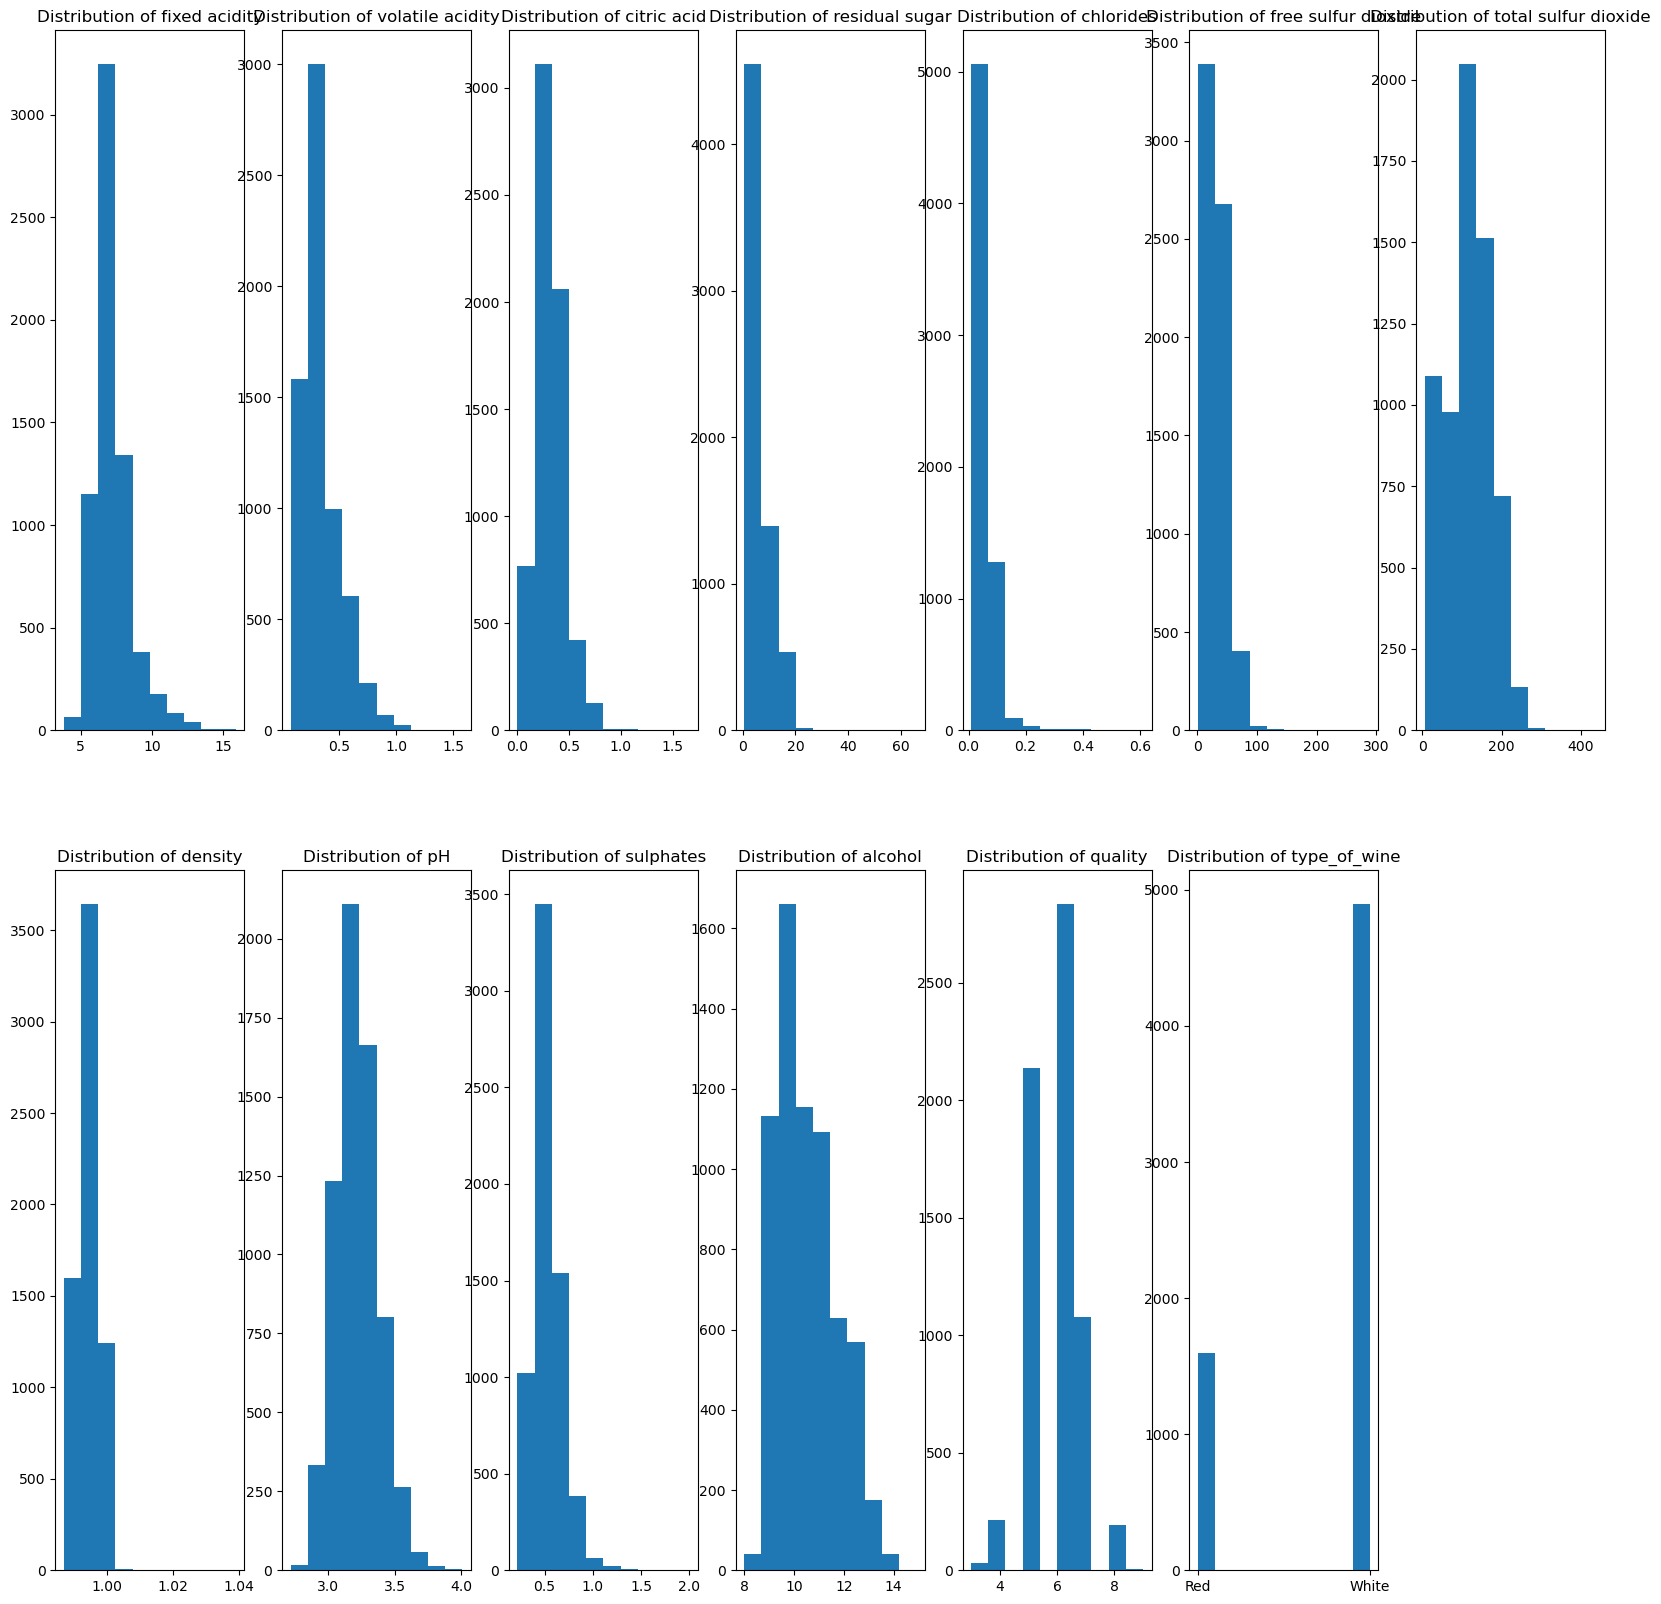

In [6]:
cols = df.columns.to_list()
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(2, round(len(cols) /2) +1, plot_number)
    plt.title(f'Distribution of {col}')
    df[col].hist(bins=10)
    plt.grid(False)
plt.show()

In [7]:
box_cols = df.drop(columns='type_of_wine').columns.to_list()

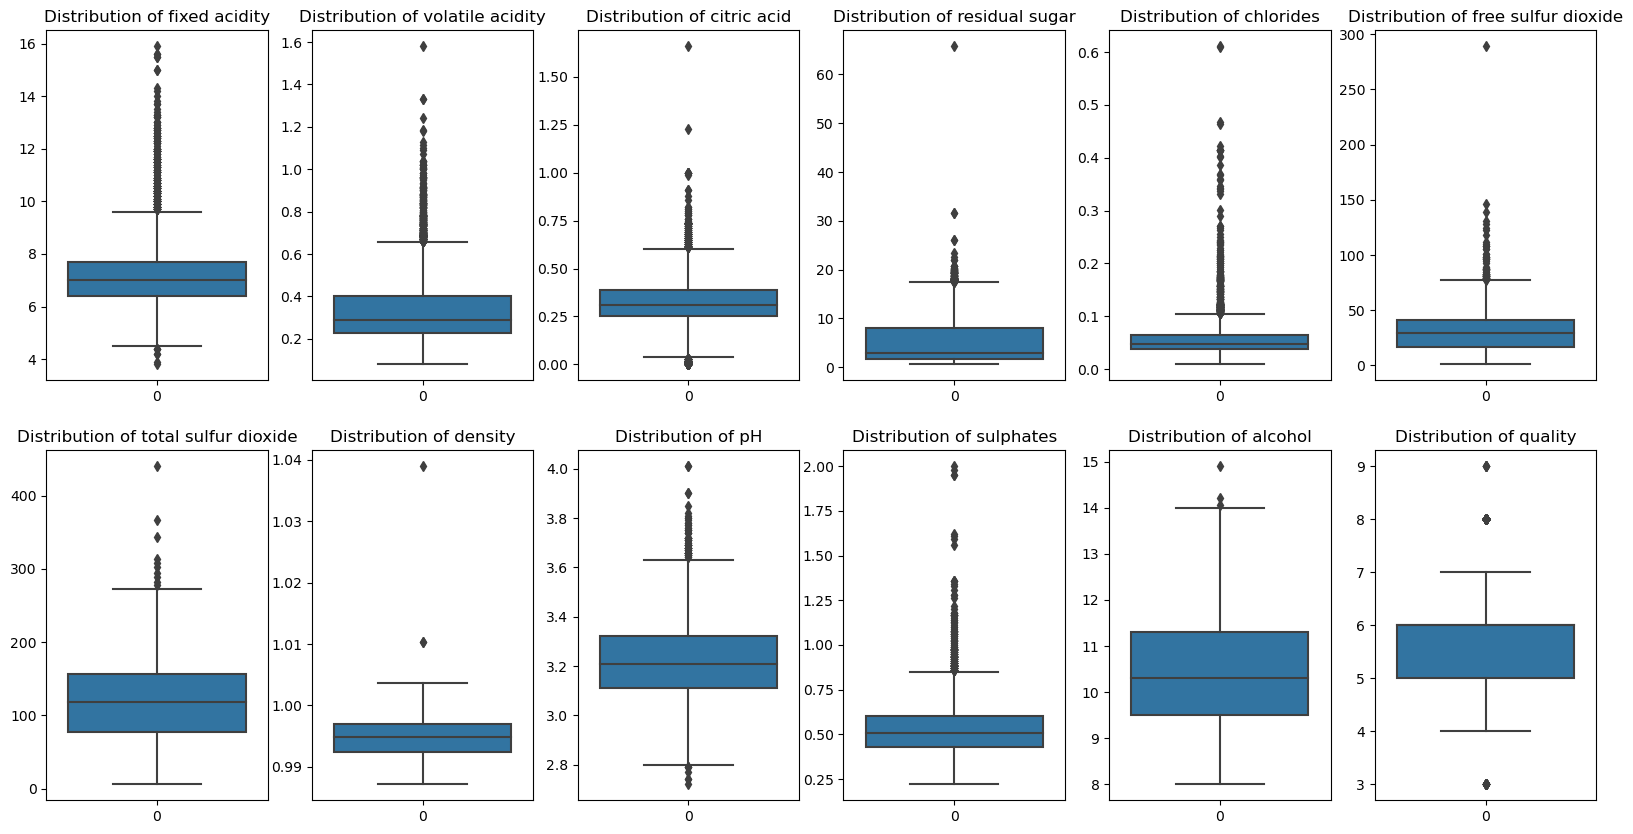

In [8]:
plt.figure(figsize=(20,10))
for i, col in enumerate(box_cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(2, round(len(cols) /2), plot_number)
    plt.title(f'Distribution of {col}')
    plt.grid(False)
    sns.boxplot(data=df[col])
plt.show()

# Bivariate analysis

In [9]:
# e.get_corr_heatmap(train)

In [10]:
def get_pairplot(df):
    '''
    This function will take in a dataFrame, and will display a pairplot of the variable
    relationships along with a regression line for each pair
    '''
    # take a sample of the dataFrame in order to cut down computing time
    plt.figure(figsize=(20,20))
    sample = df.sample(500)
    # create a pairplot
    sns.pairplot(data=sample, corner=True, kind='reg', plot_kws={'color': 'blue'})
    plt.show()

In [11]:
# get_pairplot(train)

### Looks like strong correlations to quality on 'volatile acidity', 'chlorides', 'density' and 'alcohol'

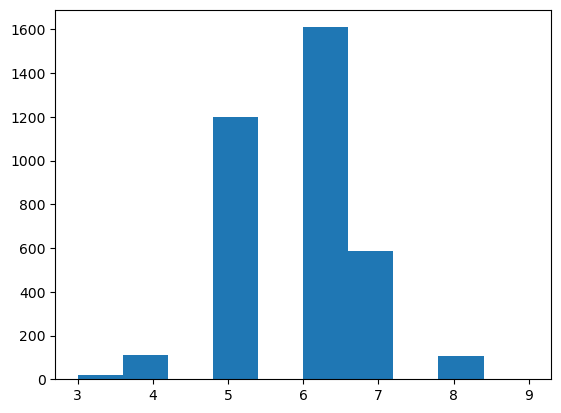

In [12]:
plt.hist(data=train, x='quality');

    quality is not very normally distributed

In [13]:
def check_hypothesis(data, x, y, α=0.05, test=stats.pearsonr):
    '''
    This function will check the provided x and y variables from the 
    provided dataset (data) for statistical relevence according 
    to a pearsonsr test (this is changable by entering the desired test as a kwarg)
    '''
    # run the requested statistical test on variables x and y from data
    r, p = test(data[x], data[y])
    # if the resulting p-value is less than alpha, then reject the null hypothesis
    if p < α:
        # print results rejecting null hypothesis
        print(f"Since the p-value is less than {α}, \n\
we can reject the null hypothesis and conclude that {x} and {y} are correlated.")
        print(f"The correlation coefficient between \
{x} and {y} is {r:.2f} with a p-value of {p:.4f}")
        print('_______________________________________________________')
    # if p-value >= alpha, then we fail to reject the null hypothesis
    else:
        # print the results failing to reject the null hypothesis
        print(f"Since the p-value is greater than or equal to {α}, \n\
we fail to reject the null hypothesis and conclude \n\
that there is insufficient evidence to suggest a correlation between {x} and {y}.")
        print('_______________________________________________________')

### quick check for statistically relevent correlations using pearsonsr

In [14]:
for col in train.drop(columns=['quality']).columns.to_list():
    check_hypothesis(train, 'quality', col)

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and fixed_acidity are correlated.
The correlation coefficient between quality and fixed_acidity is -0.08 with a p-value of 0.0000
_______________________________________________________
Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and volatile_acidity are correlated.
The correlation coefficient between quality and volatile_acidity is -0.26 with a p-value of 0.0000
_______________________________________________________
Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and citric_acid are correlated.
The correlation coefficient between quality and citric_acid is 0.07 with a p-value of 0.0000
_______________________________________________________
Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and residual_sugar are correlated.
The correlatio

## Does 'volatile acidity' have a correlation with quality?

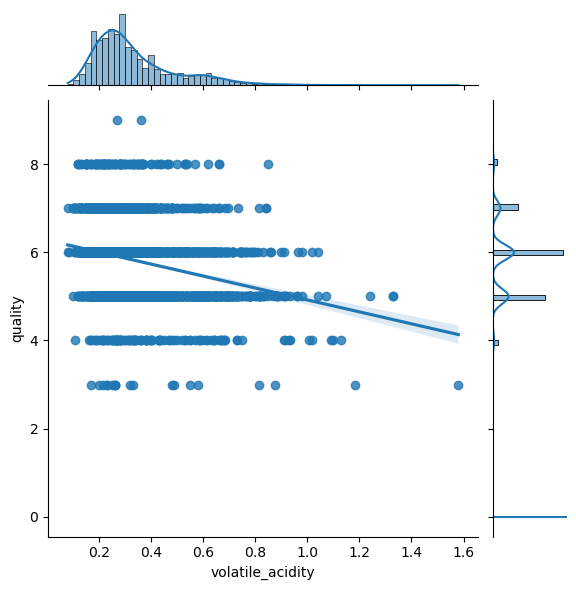

In [15]:
sns.jointplot(data=train, x='volatile_acidity', y='quality', kind='reg')
plt.axhline()
plt.show()

Is there a statistial correlation?
- volatile acidity is a continuous variable with right skew
- quality appears to be a ordinal variable, non parametric 
- we are looking to do a spearman test
- H$_0$ : There is no correlation
- H$_a$ : There is a linear correlation between quality and volatile acidity
- α = 0.05

In [16]:
# r, p = stats.spearmanr(train.quality, train['volatile acidity'])
check_hypothesis(train, 'quality', 'volatile_acidity', test=stats.spearmanr)

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and volatile_acidity are correlated.
The correlation coefficient between quality and volatile_acidity is -0.25 with a p-value of 0.0000
_______________________________________________________


### We are able to conclude that quality and volatile acidity are correlated, with a correlation coeficient of -.25 (as volatile acidity goes up, quality goes down).

### Do chlorides have a linear correlation to quality?

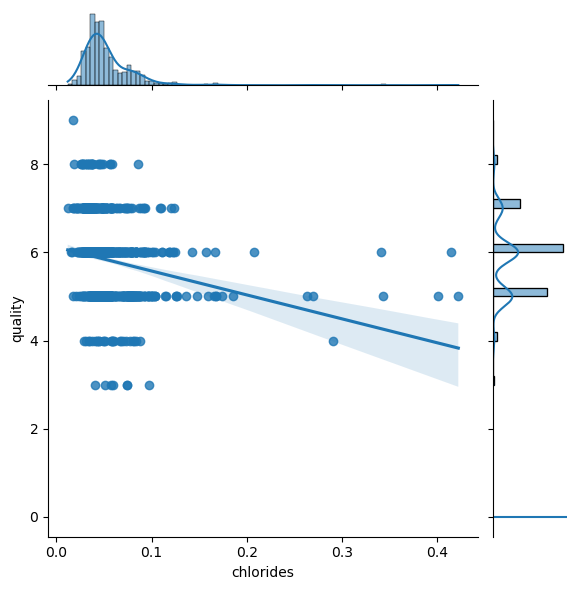

In [17]:
sns.jointplot(data=train.sample(1000), x='chlorides', y='quality', kind='reg')
plt.axhline()
plt.show()

In [18]:
def get_plot_chlorides_by_quantity(train):
    '''
    This function will show a plot of chlorides by wine quality.
    '''
    # set figure size
    plt.figure(figsize=(16,12))
    # create the plot
    sns.lmplot(data=train.sample(1000), x='chlorides', y='quality', palette='blues',
               # add a line showing the correlation
               line_kws={'color': 'red'})
    # add a title
    plt.title('As Chlorides Increases, Quality Decreases', size=15)
    # add axis labels
    plt.xlabel('Chlorides of the Wine', size=14)
    plt.ylabel('Quality Score of the Wine', size=14)
    # add a label for the correlation line
    plt.annotate('correlation line', (.15,5.5))
    # show the plot
    plt.show()

<Figure size 1600x1200 with 0 Axes>

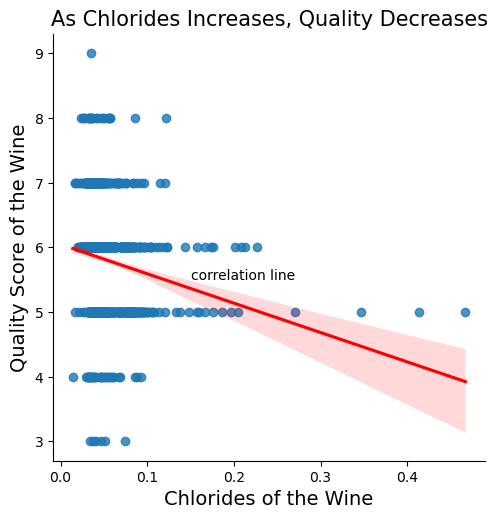

In [19]:
get_plot_chlorides_by_quantity(train)

Is there a statistial correlation?
- chlorides is a continuous variable with right skew
- quality appears to be a ordinal variable, non parametric 
- we are looking to do a spearman test
- H$_0$ : There is no correlation
- H$_a$ : There is a linear correlation between quality and volatile acidity
- α = 0.05

In [20]:
check_hypothesis(train, 'quality', 'chlorides', test=stats.spearmanr)

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and chlorides are correlated.
The correlation coefficient between quality and chlorides is -0.30 with a p-value of 0.0000
_______________________________________________________


### We are able to conclude that there is a linear correlation between quality and chlorides, with a correlation coefficient of -0.30 (as chlorides goes up, quality goes down)

### Does density have a linear correlation to quality?

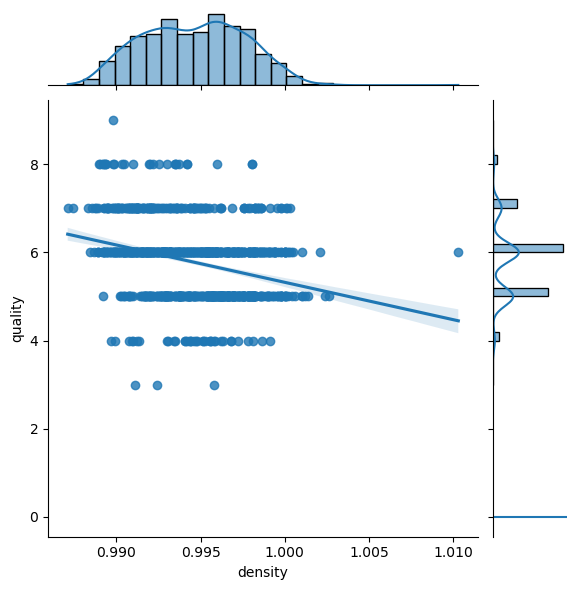

In [21]:
sns.jointplot(data=train.sample(1000), x='density', y='quality', kind='reg')
plt.axhline()
plt.show()

In [22]:
def get_plot_density_by_quantity(train):
    '''
    This function will show a plot of density by wine quality.
    '''
    # set figure size
    plt.figure(figsize=(16,12))
    # create the plot
    sns.lmplot(data=train.sample(1000), x='density', y='quality', palette='blues',
               # add a line showing the correlation
               line_kws={'color': 'red'})
    # add a title
    plt.title('As Density Increases, Quality Decreases', size=15)
    # add axis labels
    plt.xlabel('Density of the Wine', size=14)
    plt.ylabel('Quality Score of the Wine', size=14)
    # add a label for the correlation line
    plt.annotate('correlation line', (.999,5.5))
    # show the plot
    plt.show()

<Figure size 1600x1200 with 0 Axes>

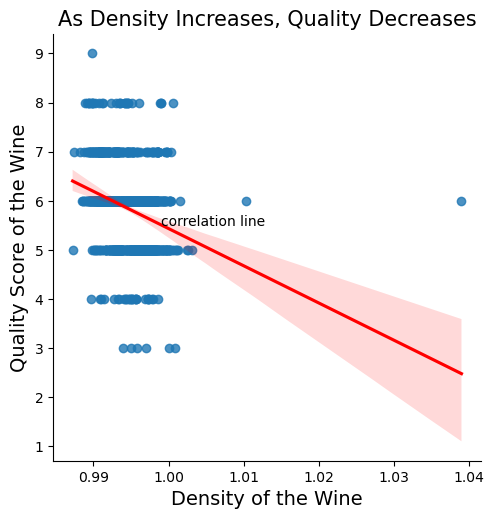

In [23]:
get_plot_density_by_quantity(train)

#### There appears to be an outlier in density

In [24]:
train.density.min()

0.98711

In [25]:
train[train.density >= 1.003].density.value_counts()

1.00315    2
1.01030    1
1.03898    1
1.00320    1
Name: density, dtype: int64

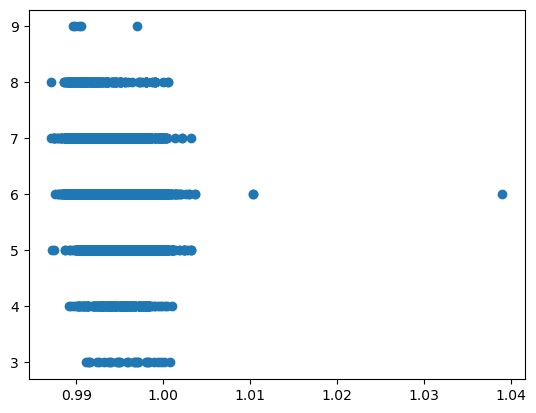

In [26]:
plt.scatter(data=df, x='density', y='quality');

In [27]:
df[df.density == 1.03898]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_of_wine
4380,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,White


#### Is there a statistial correlation?
- density is a continuous variable with right skew
- quality appears to be a ordinal variable, non parametric 
- we are looking to do a spearman test
- H$_0$ : There is no correlation
- H$_a$ : There is a linear correlation between quality and volatile acidity
- α = 0.05

In [28]:
check_hypothesis(train, 'quality', 'density', test=stats.spearmanr)

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and density are correlated.
The correlation coefficient between quality and density is -0.32 with a p-value of 0.0000
_______________________________________________________


### We are able to conclude that there is a linear correlation between quality and density, with a correlation coefficient of -0.32 (as density goes up, quality goes down)

### Does alcohol have a linear correlation to quality?

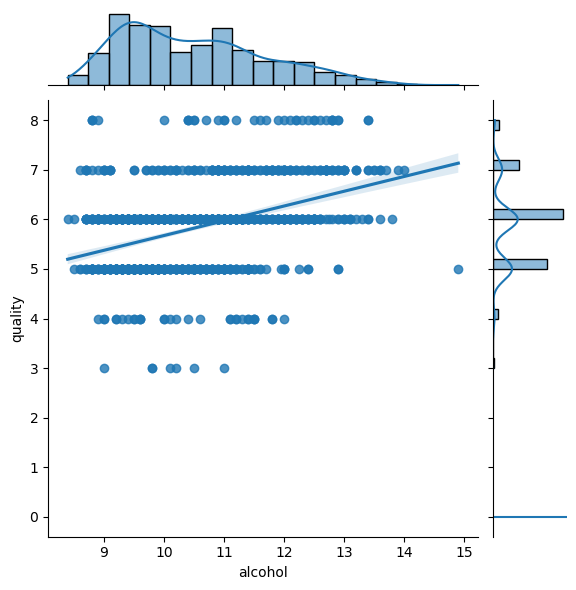

In [29]:
sns.jointplot(data=train.sample(1000), x='alcohol', y='quality', kind='reg')
plt.axhline()
plt.show()

In [30]:
def get_plot_alcohol_by_quantity(train):
    '''
    This function will show a plot of alcohol content by wine quality.
    '''
    # set figure size
    plt.figure(figsize=(16,12))
    # create the plot
    sns.lmplot(data=train, x='alcohol', y='quality', 
               # add a line showing the correlation
               line_kws={'color': 'red'})
    # add a title
    plt.title('As Alcohol Content Increases, Quality Also Increases', size=15)
    # add axis labels
    plt.xlabel('Alcohol Content in the Wine', size=14)
    plt.ylabel('Quality Score of the Wine', size=14)
    plt.annotate('correlation line', (13.2,6.5))
    # add a legend
    # show the plot
    plt.show()

<Figure size 1600x1200 with 0 Axes>

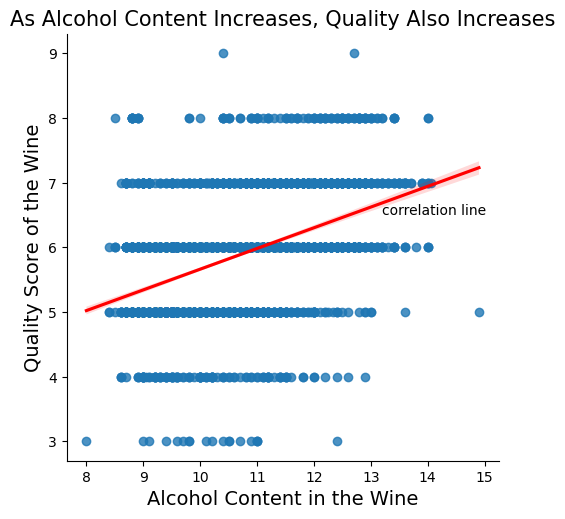

In [31]:
get_plot_alcohol_by_quantity(train)

#### Is there a statistial correlation?
- alcohol is a continuous variable with right skew
- quality appears to be a ordinal variable, non parametric 
- we are looking to do a spearman test
- H$_0$ : There is no correlation
- H$_a$ : There is a linear correlation between quality and volatile acidity
- α = 0.05

In [32]:
check_hypothesis(train, 'quality', 'alcohol', test=stats.spearmanr)

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and alcohol are correlated.
The correlation coefficient between quality and alcohol is 0.44 with a p-value of 0.0000
_______________________________________________________


### We are able to conclude that there is a linear correlation between quality and density, with a correlation coefficient of 0.44 (as alcohol goes up, quality goes up)

# Multivariate Exploration

In [33]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'type_of_wine_white'],
      dtype='object')

In [34]:
# for x_col in train.drop(columns='quality').columns:
#     for col in train.drop(columns=['quality', x_col]).columns:
#         sns.scatterplot(data=train.sample(500), x=x_col, y=col, 
#                     hue='quality', palette='magma')
#         plt.show()

## Question - If we cluster alcohol and density together, will there be a linear correlatioin with quality?

In [45]:
train_scaled['alcohol_density_group'] = e.apply_kmeans(train_scaled
                                                [['alcohol', 'density']], 3).k_means_3

/Users/aharris/codeup-data-science/wine-qualitiy-model/explore.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'k_means_{k}'] = kmeans.labels_


In [43]:
def get_plot_density_alcohol_by_quality(train_scaled):
    sns.lineplot(data=train_scaled.sample(500), x='alcohol', y='density',
               hue='alcohol_density_group', palette='magma')
    plt.show()

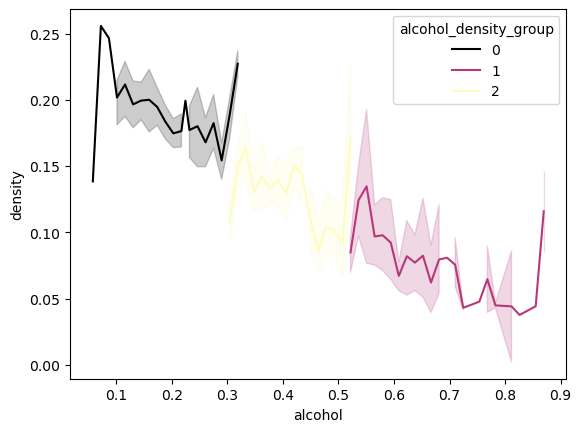

In [46]:
get_plot_density_alcohol_by_quality(train_scaled)

In [38]:
train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type_of_wine_white,alcohol_density_group
3737,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,5,1,0
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,0,1
2200,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,6,1,0
4139,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,5,1,0
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,7,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,5,1,0
3542,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,5,1,1
1884,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,5,1,1
2206,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,5,1,1


In [39]:
pd.cut(train.alcohol, 3).value_counts()

(7.993, 10.3]    1856
(10.3, 12.6]     1579
(12.6, 14.9]      202
Name: alcohol, dtype: int64

If we control for alcohol content, 